### SVM 中使用多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets

X, y = datasets.make_moons()

In [6]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

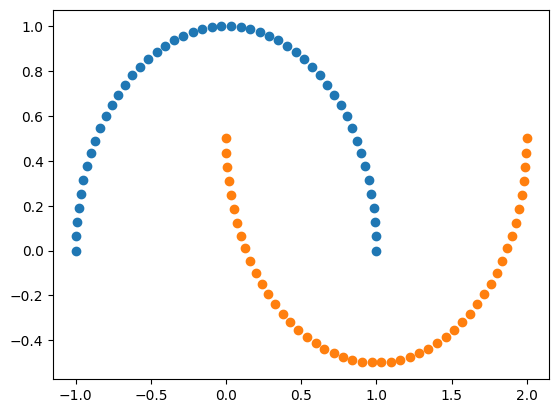

In [9]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

In [12]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

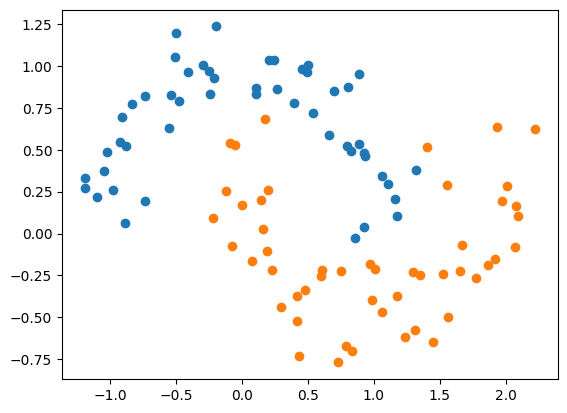

In [13]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

### 使用多项式特征的SVM

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C, dual='auto'))
    ])

In [20]:
poly_svc = PolynomialSVC(degree=3)

In [21]:
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('linearSVC', LinearSVC(dual='auto'))])

In [22]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF0A0A', '#FFF59D', '#90CAD9'])
    
    plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)

C:\Users\wh\AppData\Local\Temp\ipykernel_14084\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


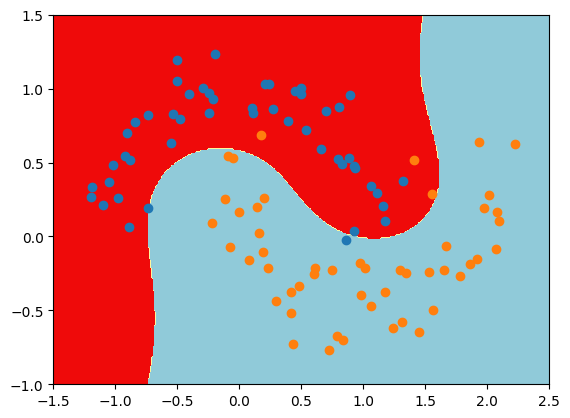

In [24]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

### 使用多项式核函数的SVM

In [26]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std+scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))  # 多项式
    ])

In [27]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('std+scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

C:\Users\wh\AppData\Local\Temp\ipykernel_14084\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


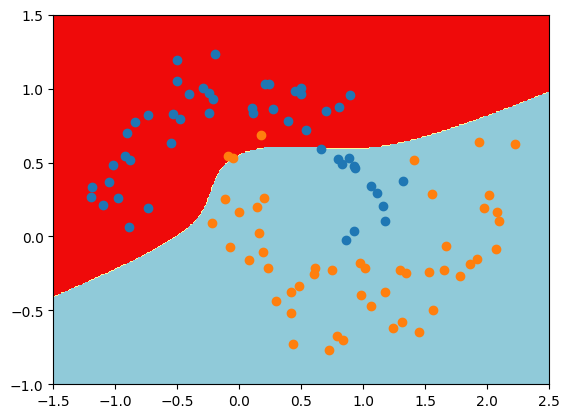

In [28]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()